In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import dataset
boat = sns.load_dataset('titanic')
boat

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
# check info before plotting
boat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# check null values
boat.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot: >

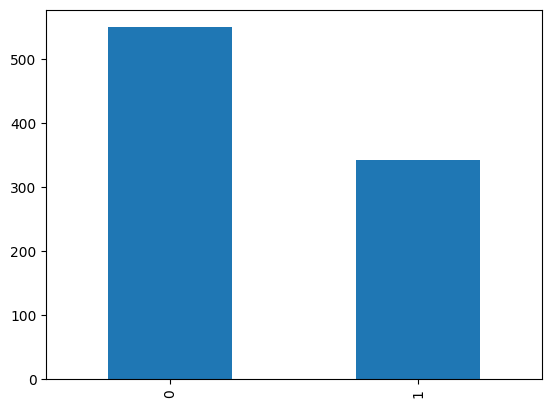

In [6]:
# plot something
# plot a bar chart after counting values
boat.survived.value_counts().plot(kind='bar')

<AxesSubplot: xlabel='survived', ylabel='count'>

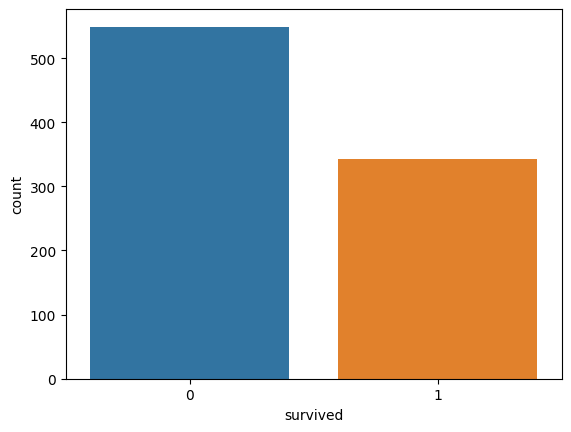

In [7]:
# second way
sns.countplot(x='survived', data=boat)

<AxesSubplot: xlabel='survived', ylabel='count'>

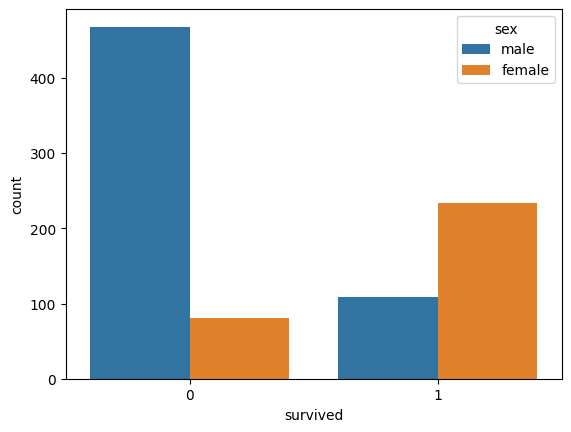

In [8]:
sns.countplot(x='survived', hue = 'sex', data=boat)

<AxesSubplot: xlabel='age', ylabel='fare'>

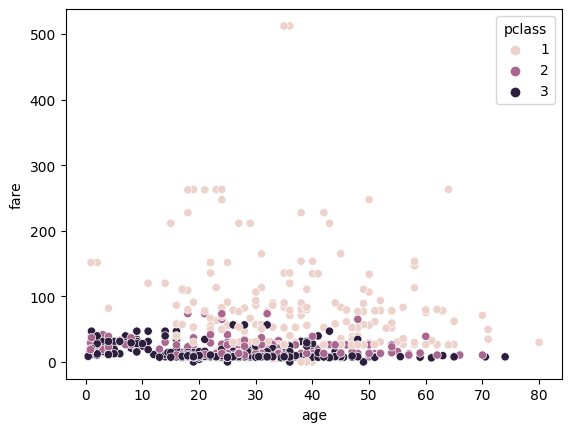

In [9]:
# Scatter plot
sns.scatterplot(x='age', y='fare', hue='pclass', data=boat)

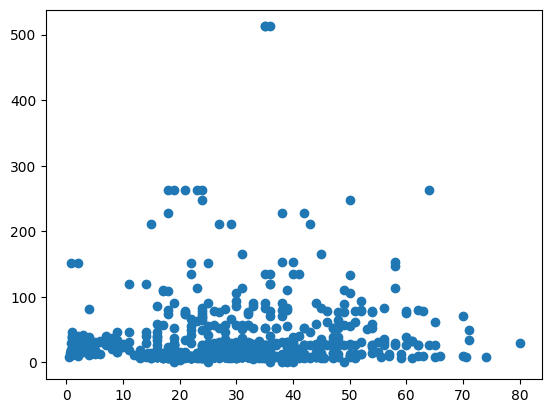

In [10]:
# second way
plt.scatter(x='age', y='fare', data=boat)
colors = {1:'red', 2:'blue', 3:'green'}

In [11]:
boat.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


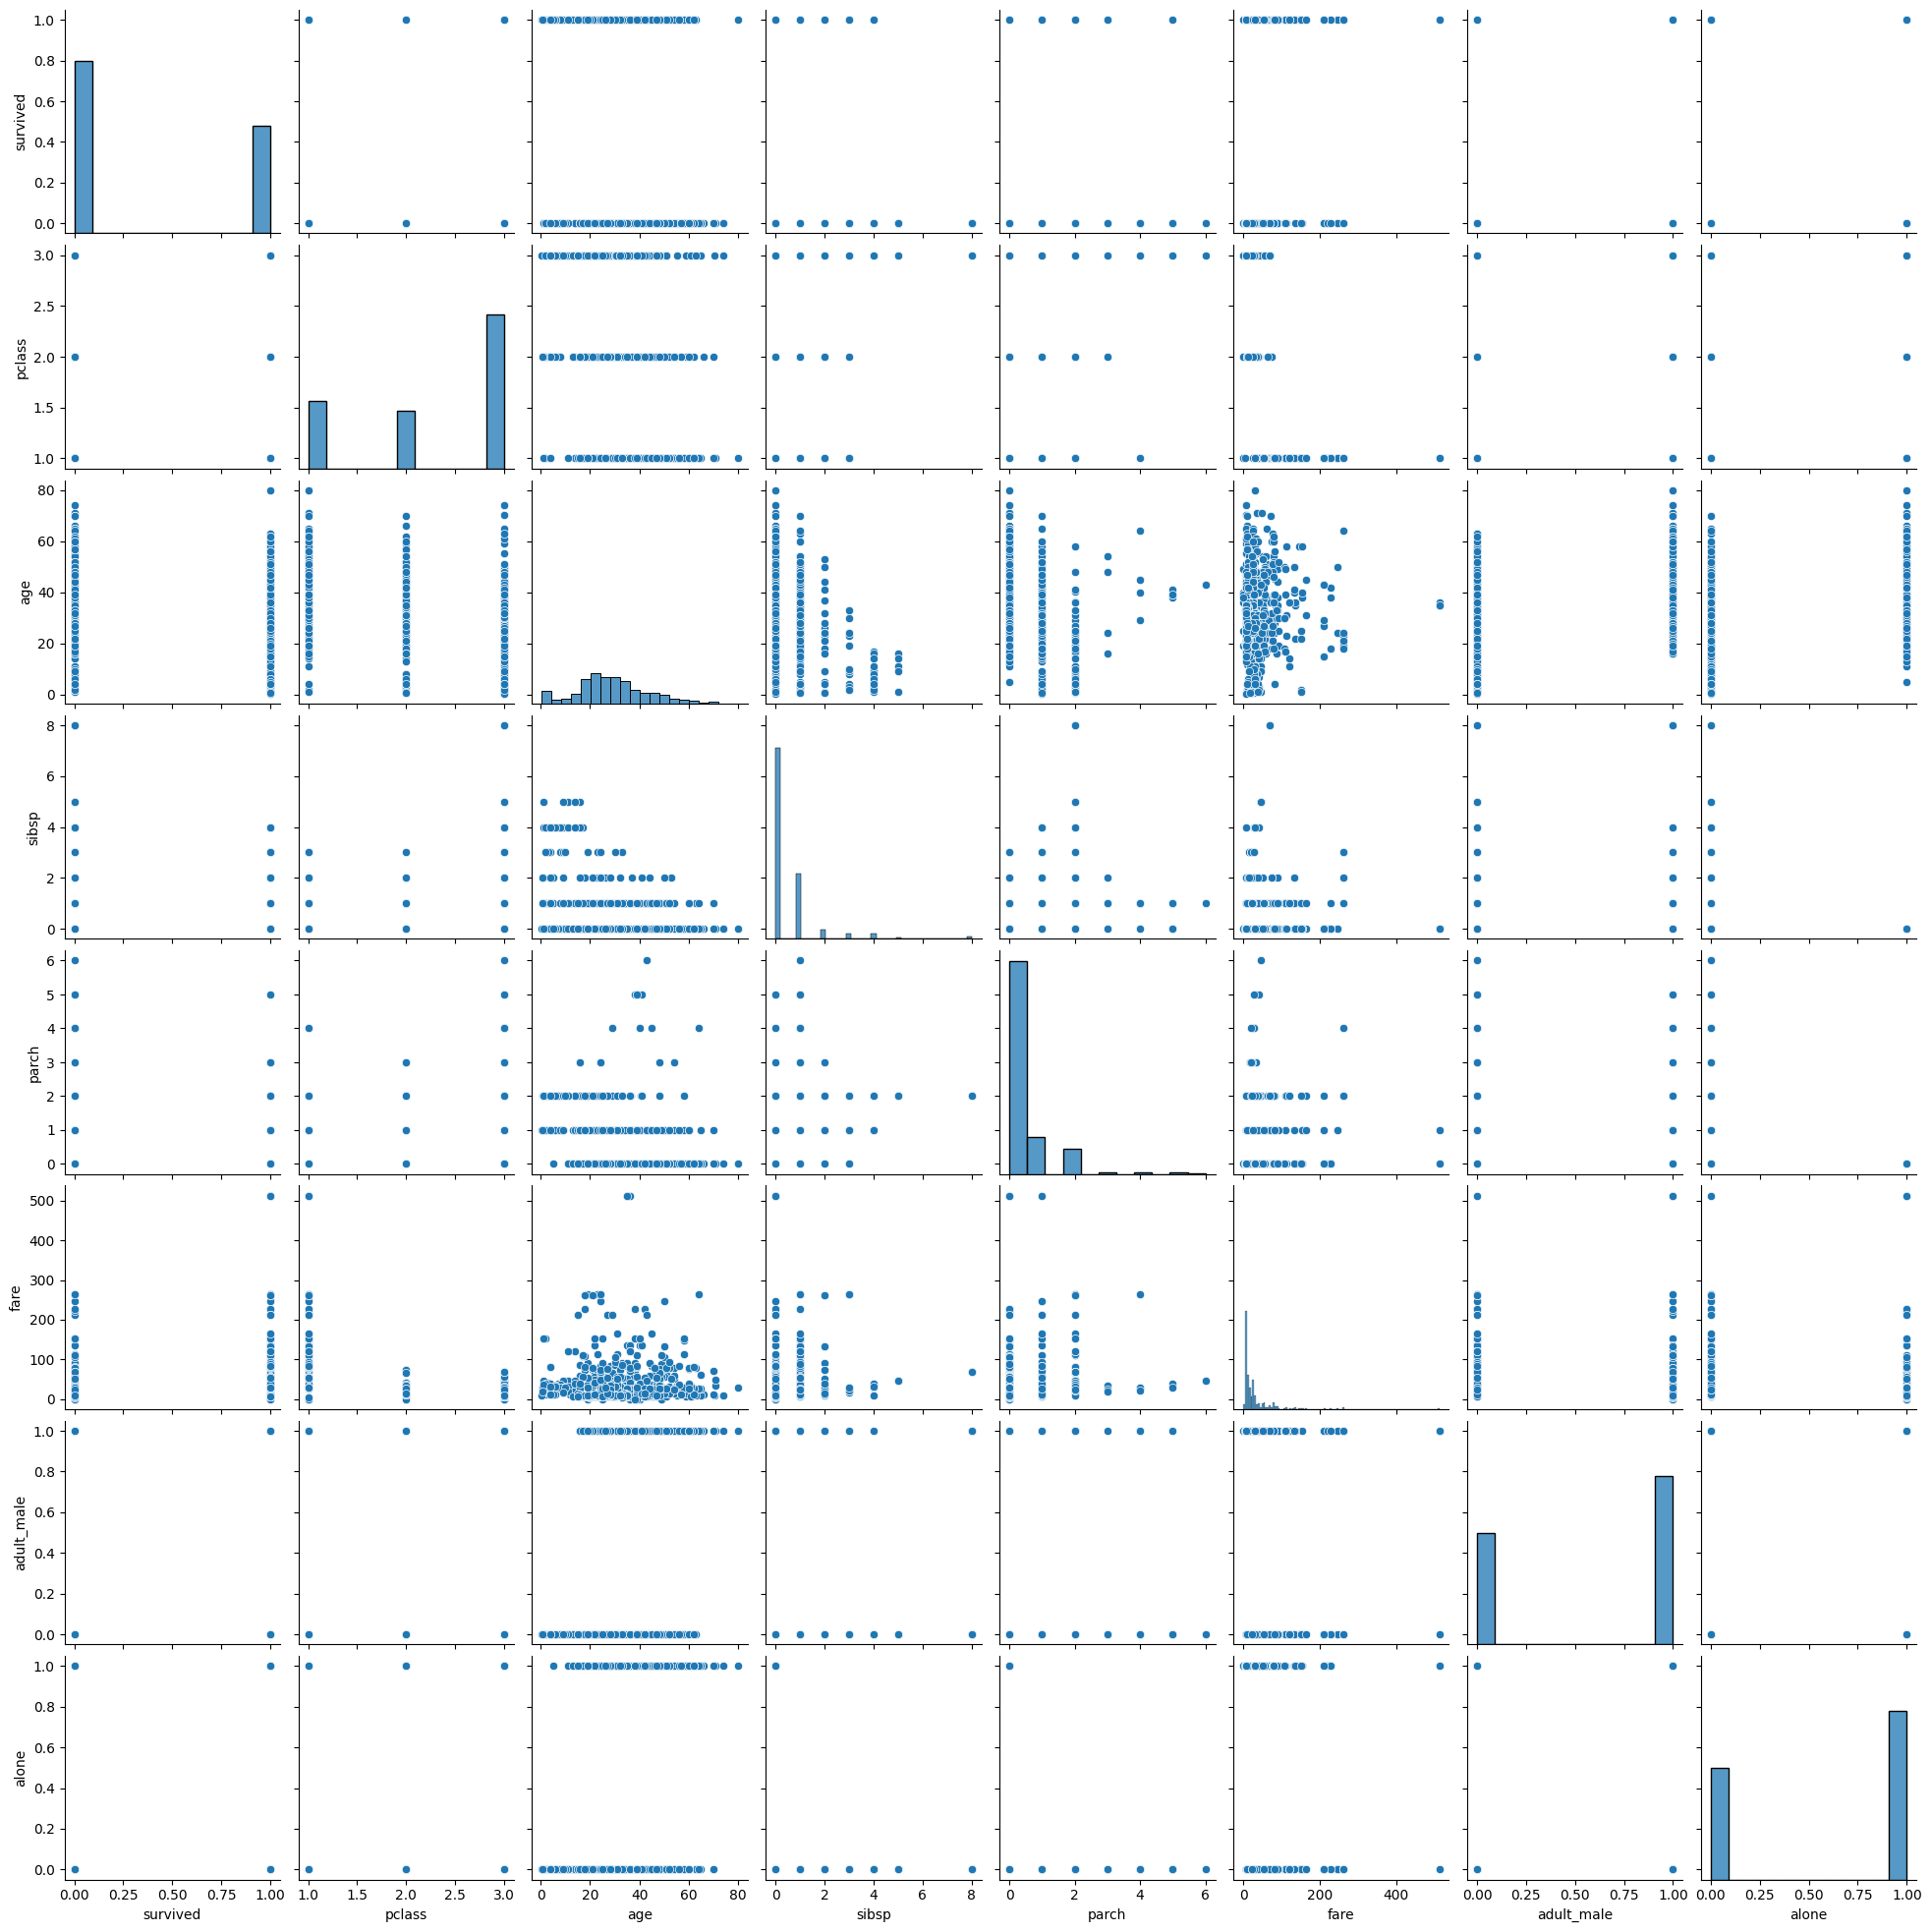

In [12]:
sns.pairplot(boat)

array([[<AxesSubplot: title={'center': 'survived'}>,
        <AxesSubplot: title={'center': 'pclass'}>],
       [<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sibsp'}>],
       [<AxesSubplot: title={'center': 'parch'}>,
        <AxesSubplot: title={'center': 'fare'}>]], dtype=object)

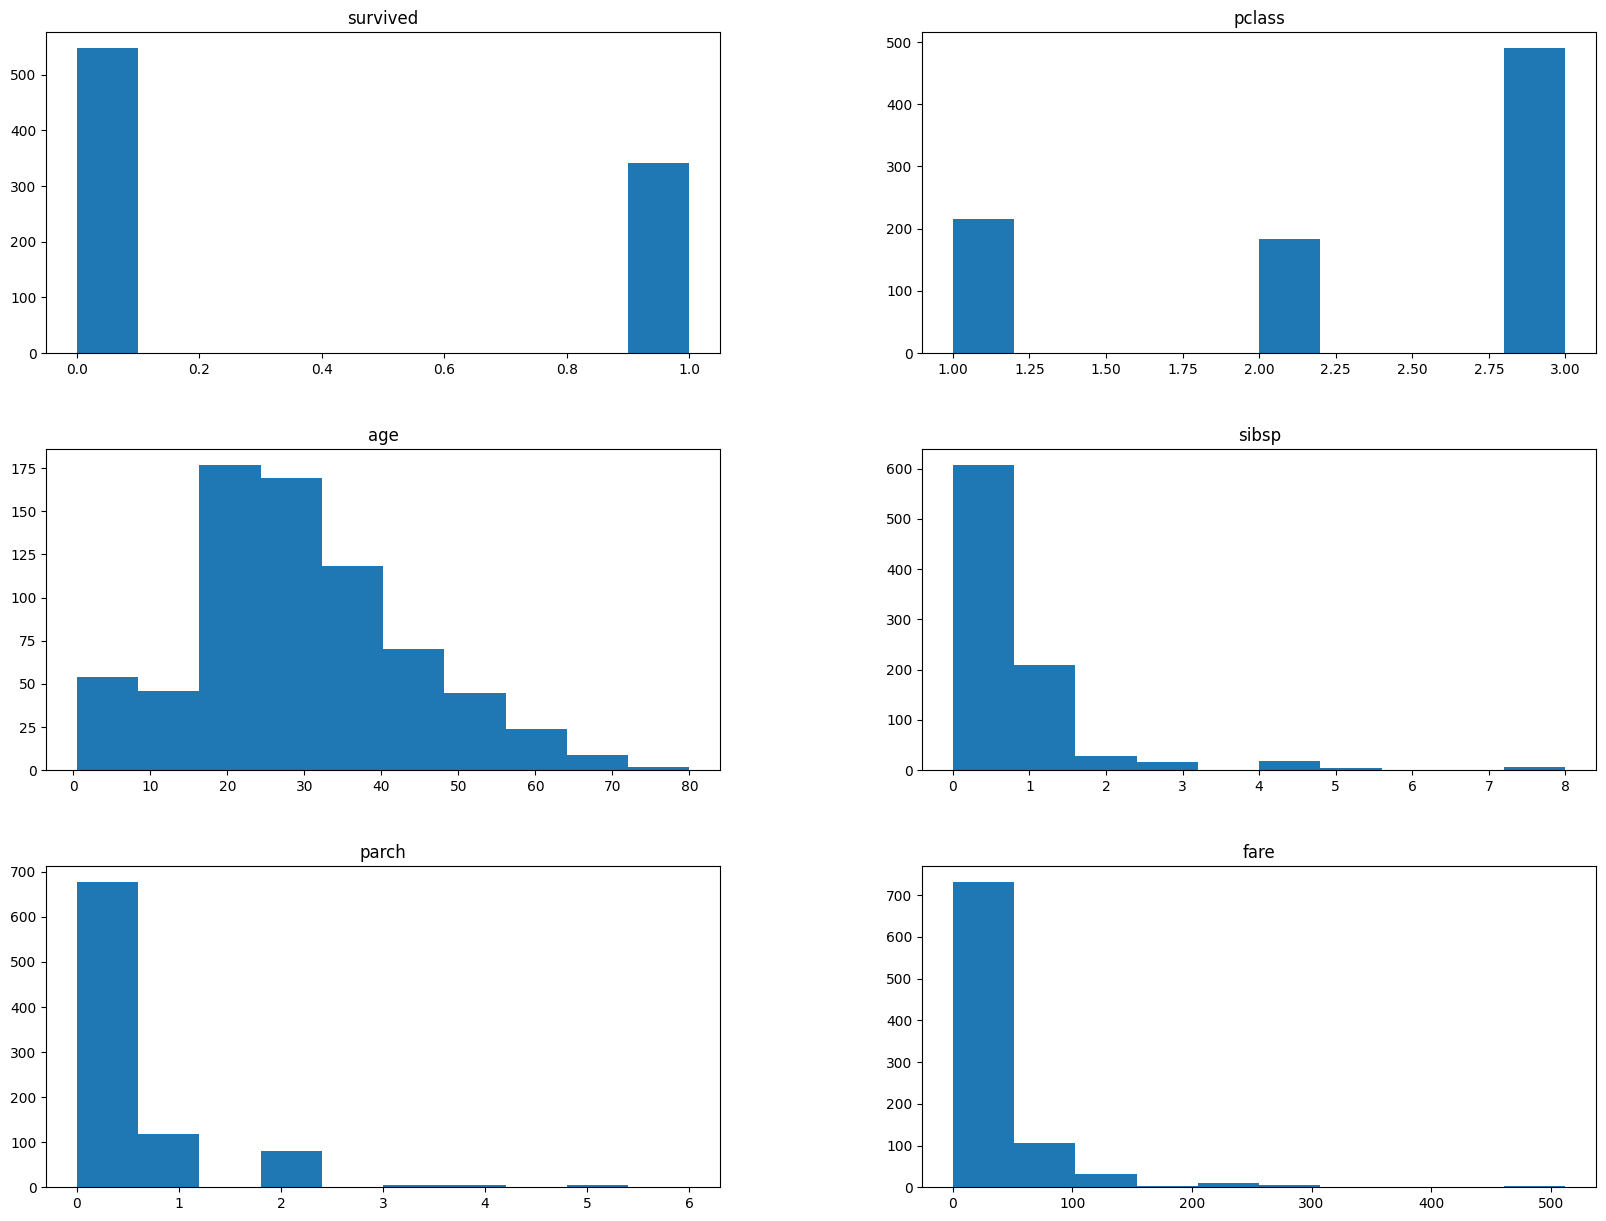

In [13]:
# these are bins, 
boat.hist(bins=10, figsize=(20,15), grid=False)

<AxesSubplot: xlabel='sex', ylabel='fare'>

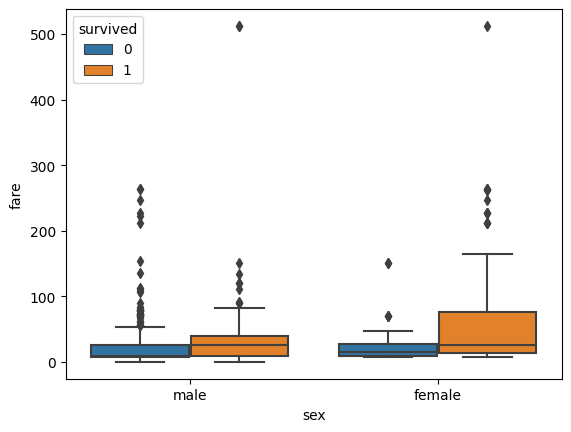

In [14]:
sns.boxplot(data=boat, x='sex', y='fare', hue='survived')

<AxesSubplot: xlabel='sex', ylabel='fare'>

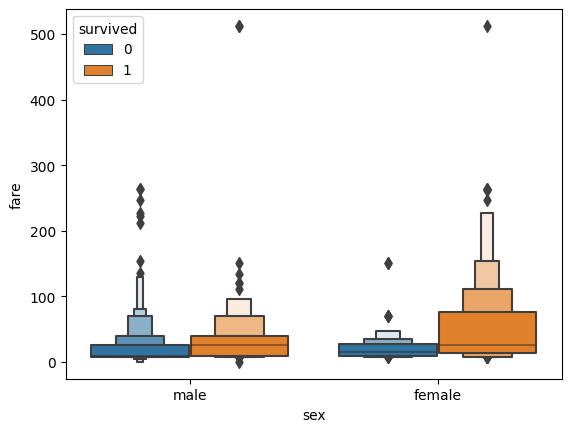

In [15]:
sns.boxenplot(data=boat, x='sex', y='fare', hue='survived')

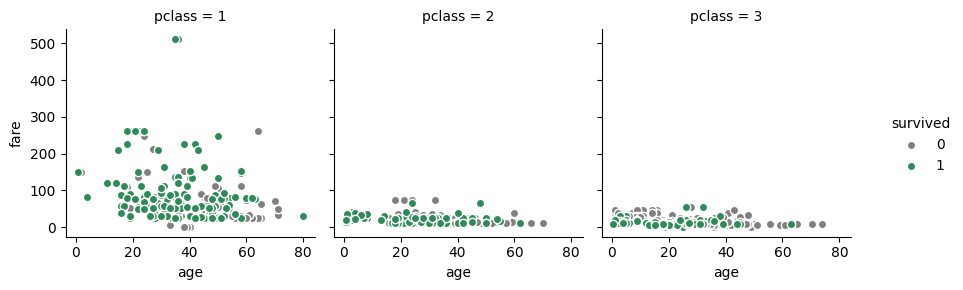

In [16]:
# facet grid
g = sns.FacetGrid(boat, col='pclass', hue='survived', margin_titles=True, palette={1:"seagreen", 0:"gray"}) # It is a grid of plots, just a canvas

g =g.map(plt.scatter, 'age', 'fare', edgecolor="w").add_legend()  # we scatter dots in canvas


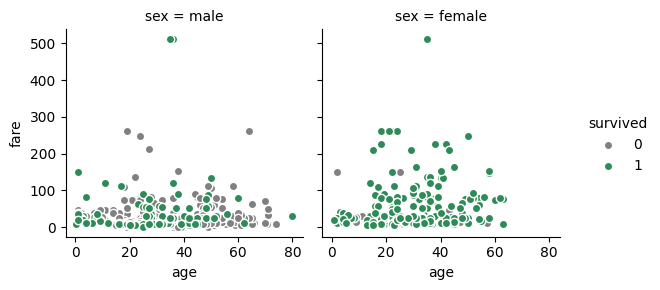

In [17]:
# facet grid
g = sns.FacetGrid(boat, col='sex', hue='survived', margin_titles=True, palette={1:"seagreen", 0:"gray"}) # It is a grid of plots, just a canvas

g =g.map(plt.scatter, 'age', 'fare', edgecolor="w").add_legend()  # we scatter dots in canvas

<AxesSubplot: xlabel='sex', ylabel='fare'>

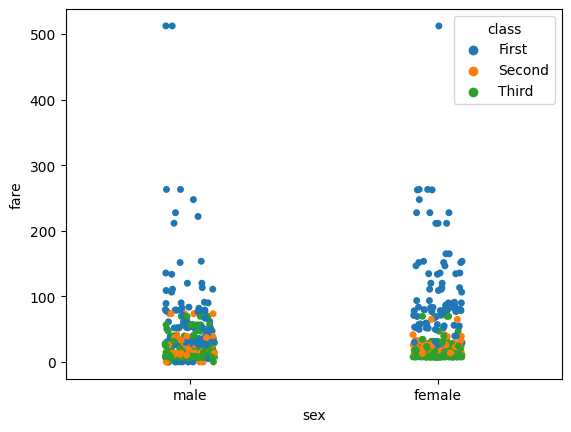

In [18]:
# combine two plots bar plot and scatter plot
sns.stripplot(data=boat, x = "sex", y="fare", hue="class")

C:\Users\hp\AppData\Local\Temp\ipykernel_21976\2996153211.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = boat.corr()


Text(0.5, 1.0, 'Heatmap of Titanic Dataset')

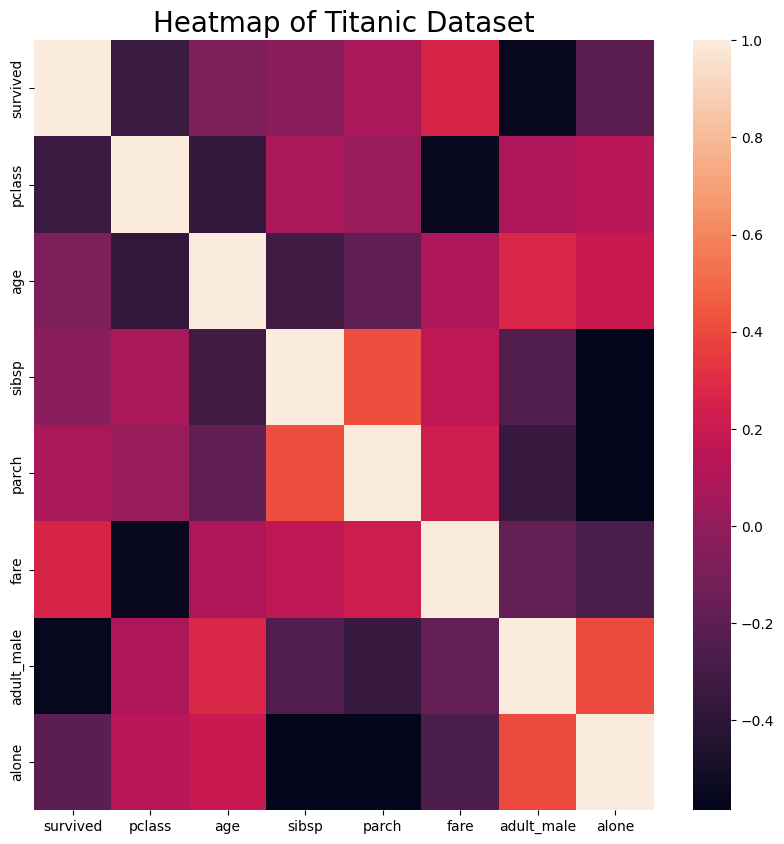

In [20]:
# heatmap
# correlation is relation between two variables, it is a number between -1 and 1, correlation is either positive or negative
corr = boat.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr)
plt.title("Heatmap of Titanic Dataset", fontsize=20)

<AxesSubplot: xlabel='sex', ylabel='fare'>

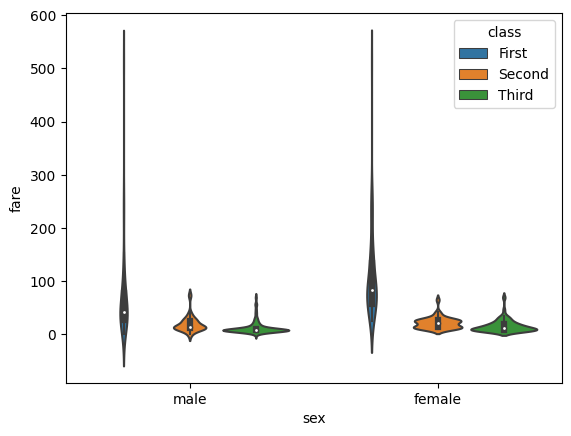

In [21]:
sns.violinplot(data=boat, x = "sex", y="fare", hue="class")